In [410]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score ,f1_score,classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [307]:
df= pd.read_csv("../Dataset/Placement_Data_Full_Class.csv")

In [308]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [309]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [310]:
df = df.drop('sl_no',axis=1)

In [311]:
nrows,ncols=df.shape
print(f"Number of rows : {nrows} \nNumber of columns : {ncols}")

Number of rows : 215 
Number of columns : 14


In [312]:
#Checking for the null values

df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [313]:
#Checking for the duplicated values

df.duplicated().sum()

np.int64(0)

In [314]:
# checking for data type of columns that are in the dataset

df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [315]:
#Handling null values of salary 

df['salary'] = df['salary'].fillna(0)

In [316]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

Data Preprocessing

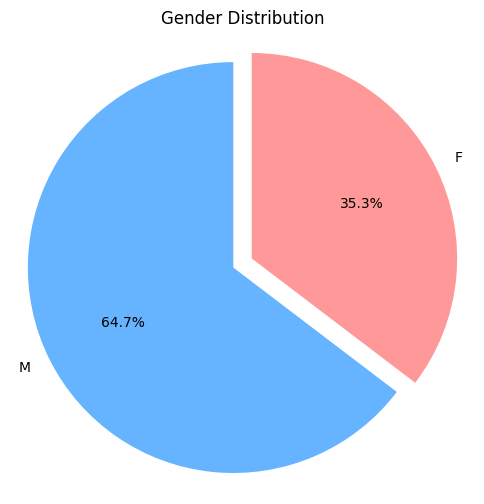

In [317]:
# Create a pie chart for gender distribution
gender_counts = df['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], explode=(0.1, 0))
plt.title("Gender Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

No. of student placed and not placed based on gender:
 gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: count, dtype: int64


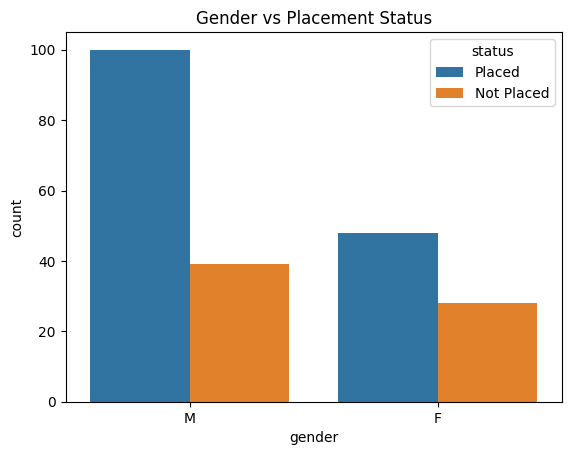

In [318]:
gender_count = df.groupby('gender').status.value_counts()
print("No. of student placed and not placed based on gender:\n" ,gender_count)

# Countplot for gender and placement status
sns.countplot(x='gender', hue='status', data=df)
plt.title("Gender vs Placement Status")
plt.show()

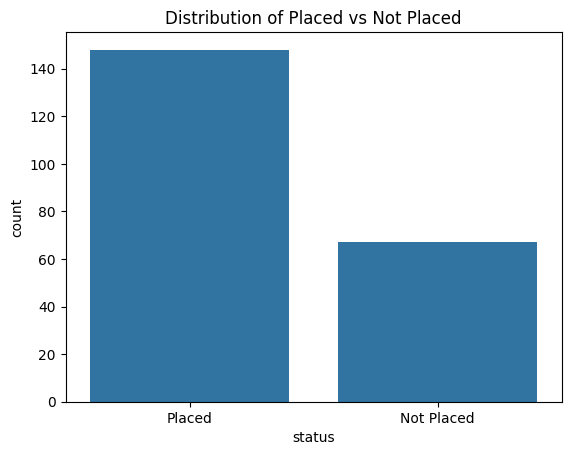

In [319]:
# Visualize the distribution of the 'status' variable

sns.countplot(x='status', data=df)
plt.title("Distribution of Placed vs Not Placed")
plt.show()

No. of student placed and not placed based on Work experience:
 workex  status    
No      Placed        84
        Not Placed    57
Yes     Placed        64
        Not Placed    10
Name: count, dtype: int64


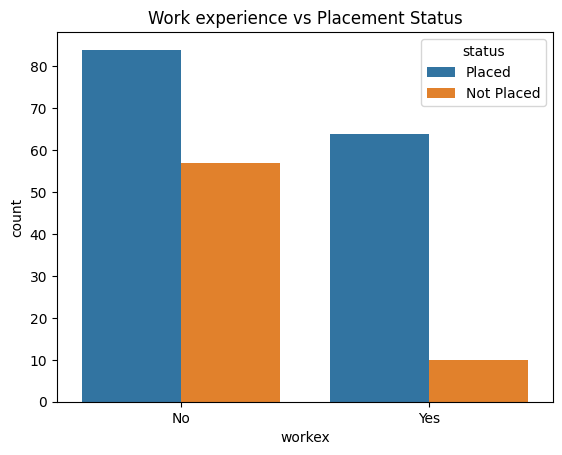

In [320]:
work_ex_count = df.groupby('workex').status.value_counts()
print("No. of student placed and not placed based on Work experience:\n" ,work_ex_count)

# Countplot for Work experience and placement status
sns.countplot(x='workex', hue='status', data=df)
plt.title("Work experience vs Placement Status")
plt.show()

In [321]:
specialization_count = df.groupby('specialisation').status.value_counts()
print("No. of student placed and not placed based on specialization:\n" ,specialization_count)

No. of student placed and not placed based on specialization:
 specialisation  status    
Mkt&Fin         Placed        95
                Not Placed    25
Mkt&HR          Placed        53
                Not Placed    42
Name: count, dtype: int64


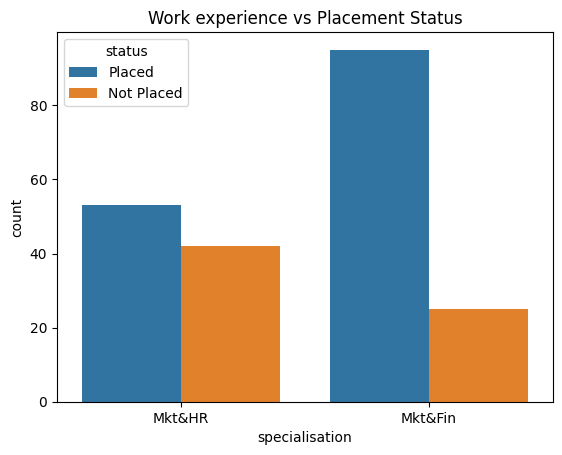

In [322]:
# Countplot for Work experience and placement status
sns.countplot(x='specialisation', hue='status', data=df)
plt.title("Work experience vs Placement Status")
plt.show()

Encoding and Transforming

In [323]:
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])
df['ssc_b']= le.fit_transform(df['ssc_b'])
df['hsc_b']= le.fit_transform(df['hsc_b'])
df['hsc_s']= le.fit_transform(df['hsc_s'])
df['degree_t']= le.fit_transform(df['degree_t'])
df['workex']= le.fit_transform(df['workex'])
df['specialisation']= le.fit_transform(df['specialisation'])
df['status']= le.fit_transform(df['status'])

In [324]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [325]:
df.corr()['status']

gender            0.090670
ssc_p             0.607889
ssc_b             0.037297
hsc_p             0.491228
hsc_b             0.016945
hsc_s             0.033442
degree_p          0.479861
degree_t         -0.020352
workex            0.276060
etest_p           0.127639
specialisation   -0.250655
mba_p             0.076922
status            1.000000
salary            0.865774
Name: status, dtype: float64

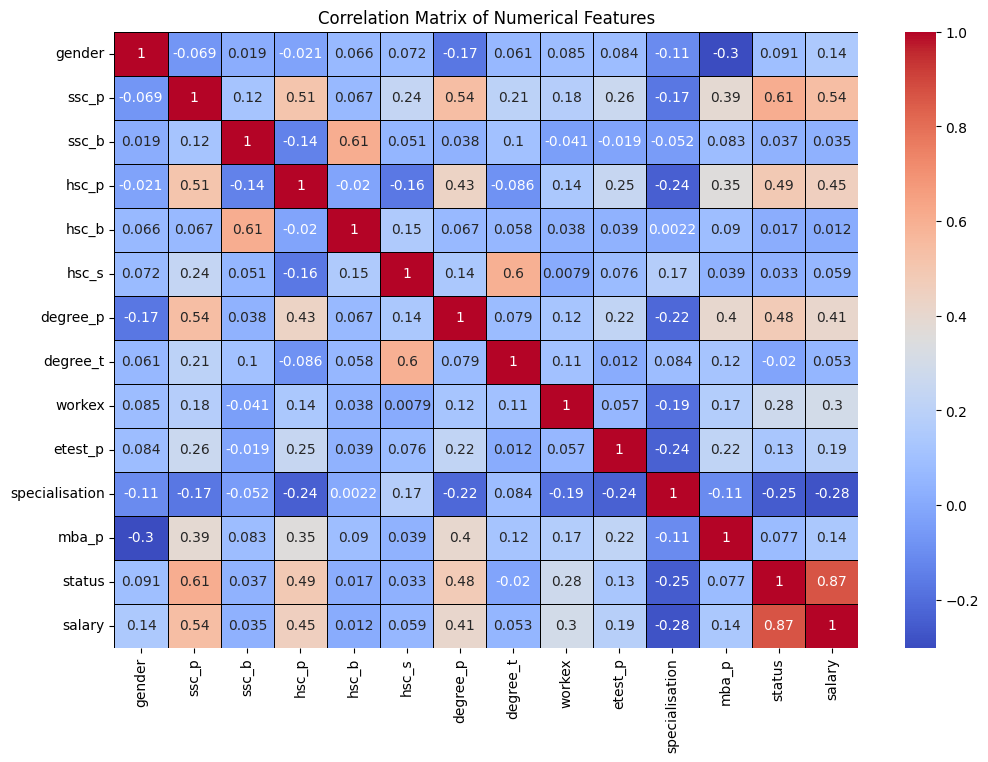

In [326]:
corr_matrix = df.corr()

# 2. Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

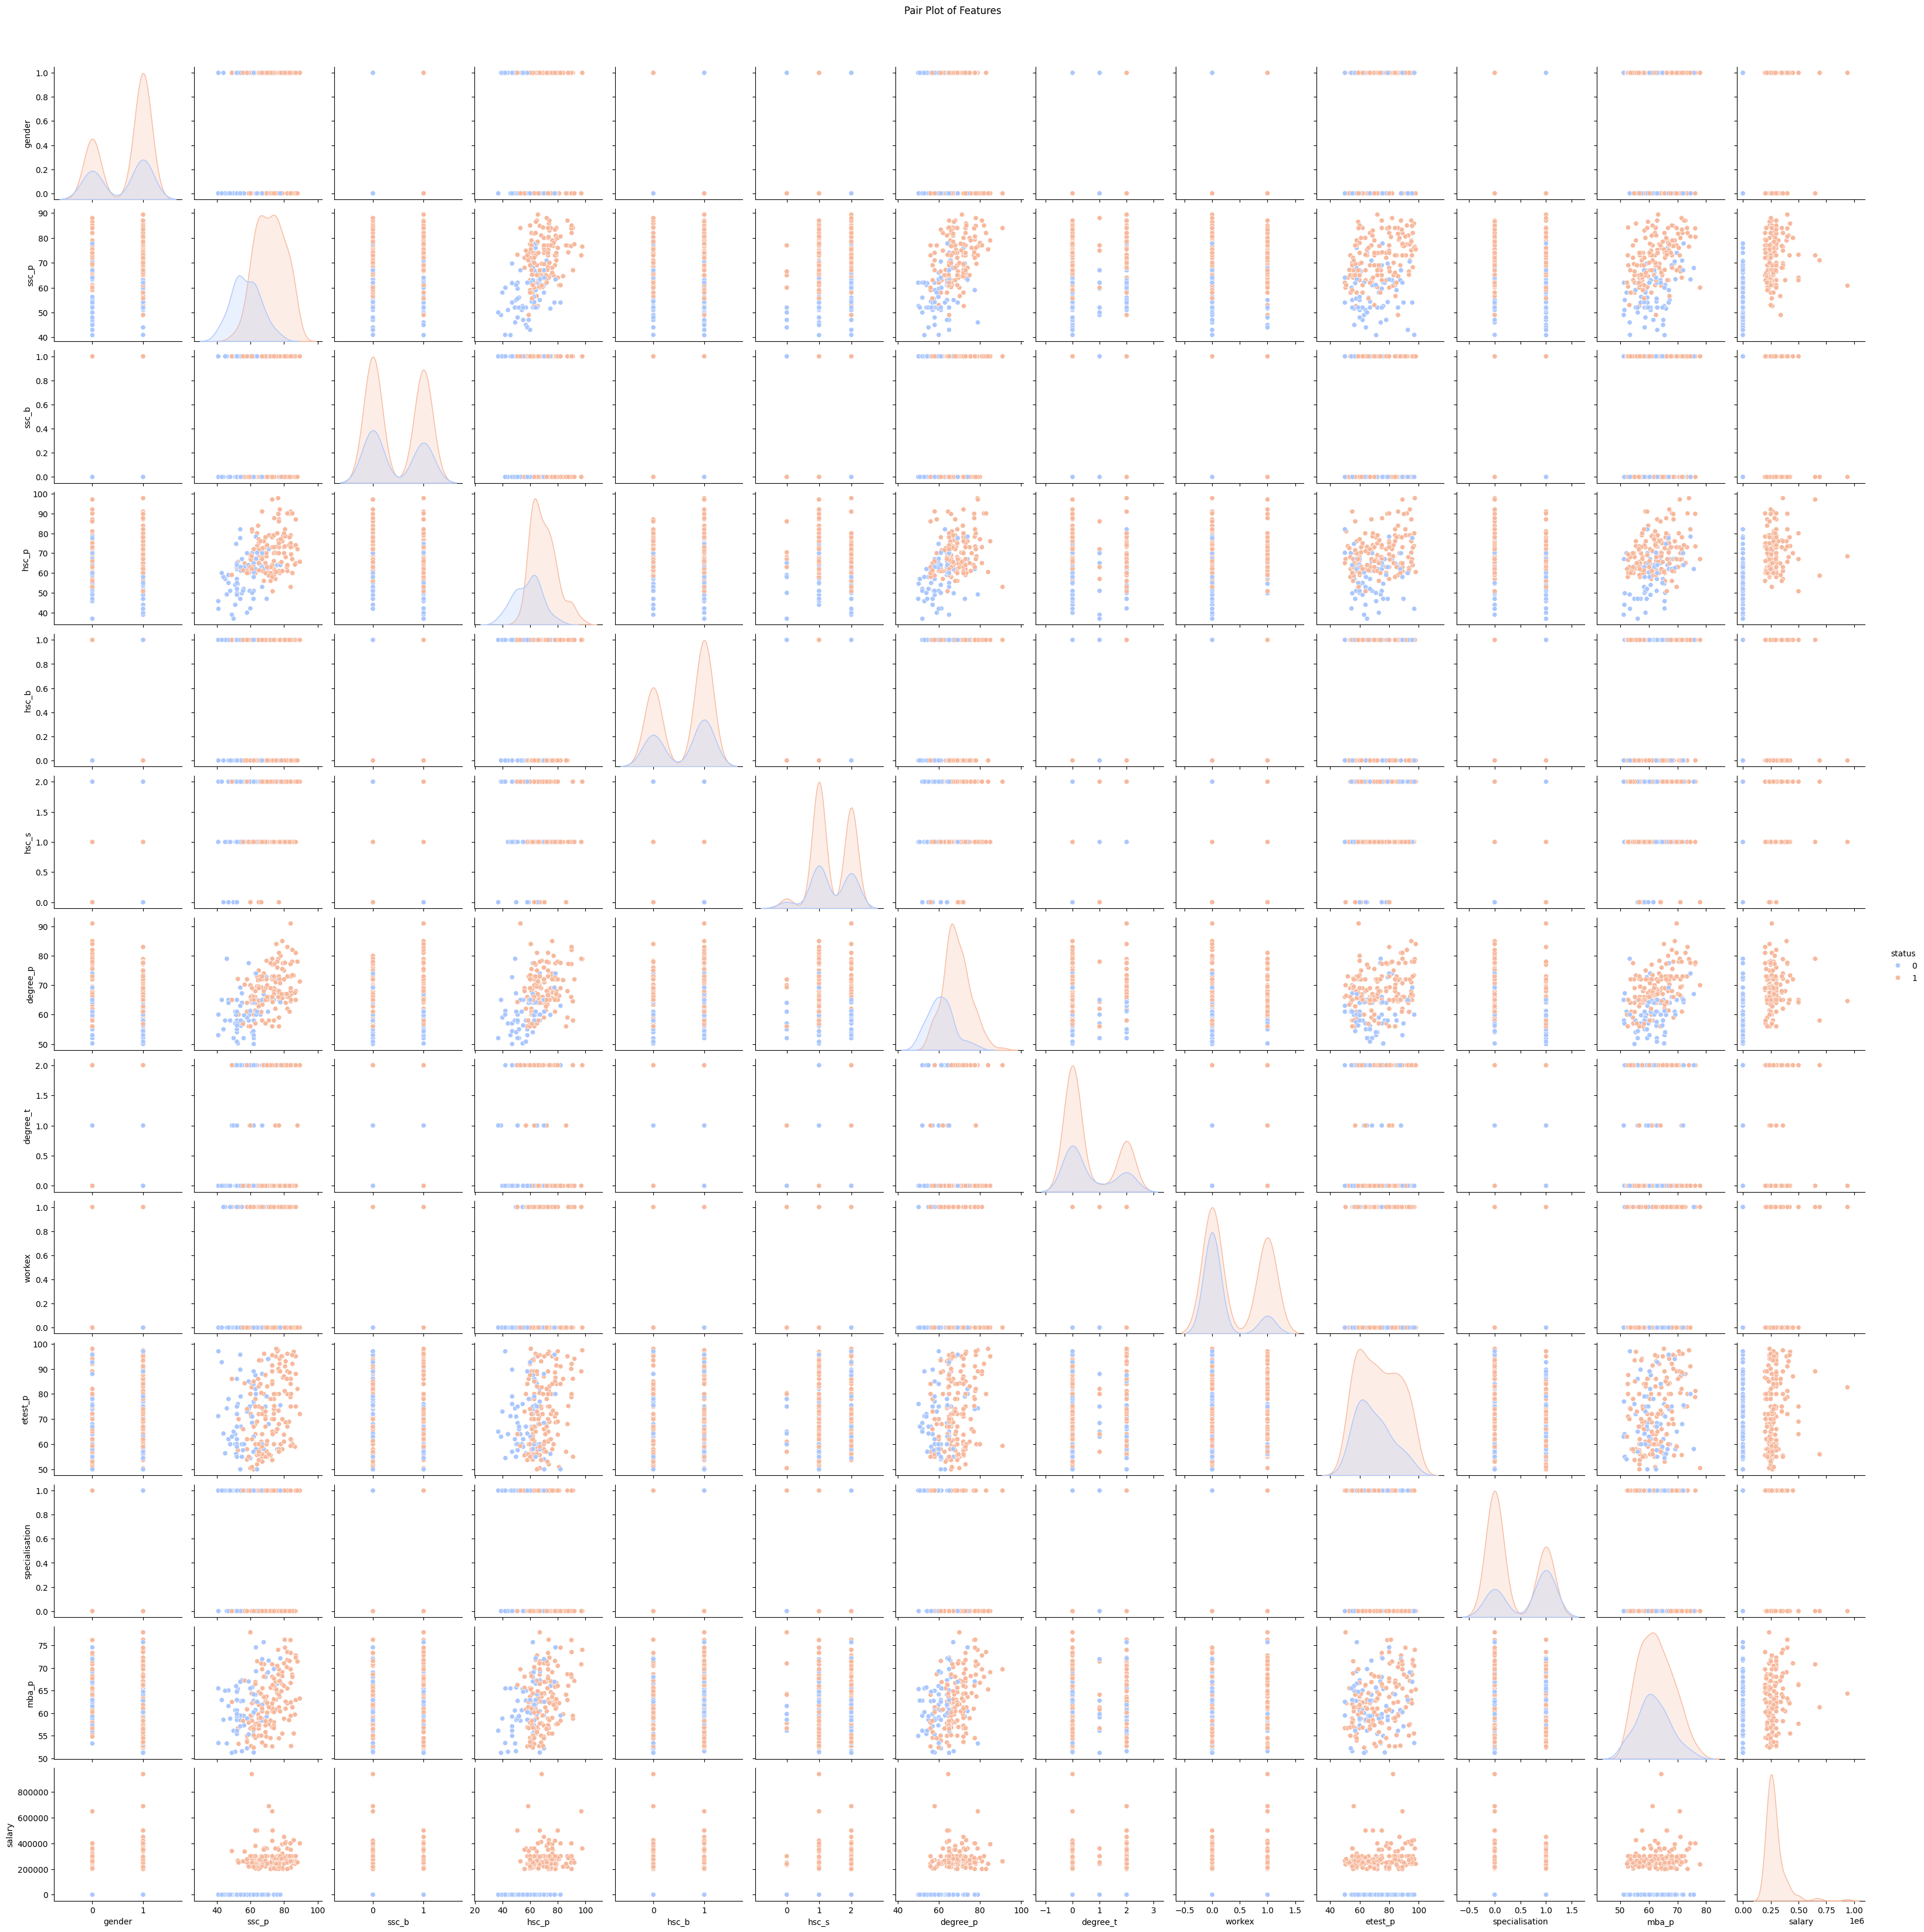

In [327]:
# pair plot to obserb the relationship between each individual vaiables with the target variables
sns.pairplot(df, diag_kind='kde', hue='status', palette='coolwarm')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

In [328]:
X = df.drop(['status', 'salary'], axis=1)
y = df['status']

In [329]:
#Splitting the dataset into train and test

X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=7)

Model Selection

In [386]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred_lr)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred_lr)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,y_pred_lr)*100}\n\n\n")


Confusion Matrix is: 
 [[12  8]
 [ 5 40]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.83      0.89      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.74      0.75        65
weighted avg       0.79      0.80      0.80        65




Accuracy Percent is: 
 80.0





Hyperparameter Tuning for Logistic Regression

In [381]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers
    'penalty': ['l1', 'l2']  # Penalties
}

# Apply GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters and score
print("Best parameters:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.8733333333333334


In [380]:
lr_best = grid_search_lr.best_estimator_

In [382]:
best_lr = LogisticRegression(C= 0.1, penalty= 'l2', solver='lbfgs')
best_lr.fit(X_train, y_train)
ypred_lr=best_lr.predict(X_test)

In [383]:
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,ypred_lr)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,ypred_lr)}\n\n\n")

Confusion Matrix is: 
 [[12  8]
 [ 3 42]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.84      0.93      0.88        45

    accuracy                           0.83        65
   macro avg       0.82      0.77      0.78        65
weighted avg       0.83      0.83      0.82        65






In [384]:
accuracy=accuracy_score(y_test,ypred_lr)

In [385]:
print("Accuracy Score :", accuracy)

Accuracy Score : 0.8307692307692308


In [390]:
classification_report_lr=classification_report(y_test,ypred_lr,output_dict=True)

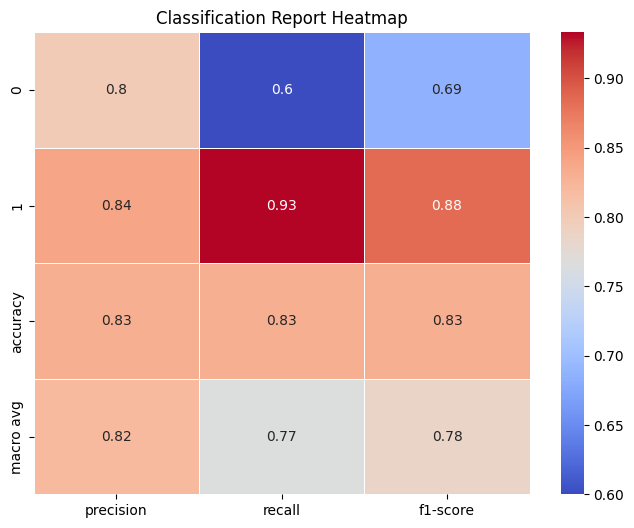

In [391]:
report_lr = pd.DataFrame(classification_report_lr).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_lr.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

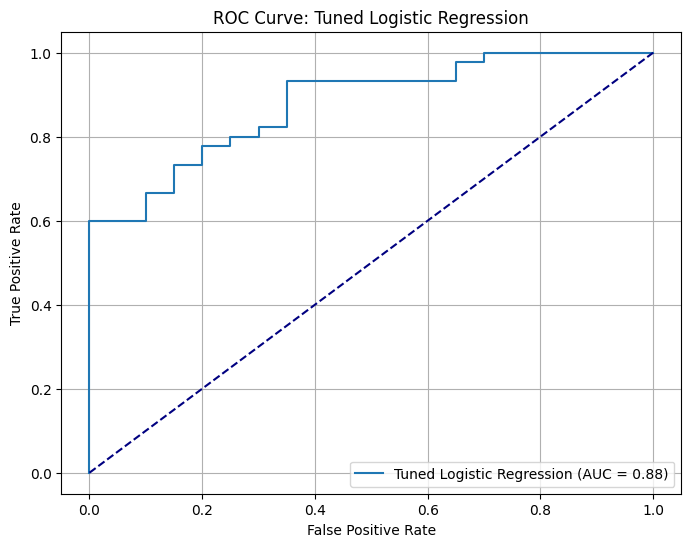

Tuned Logistic Regression AUC: 0.8788888888888889


In [373]:
# Predict probabilities and calculate ROC for best model

y_pred_proba_tuned = best_lr.predict_proba(X_test)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

# 3. Plotting the ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Logistic Regression (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Tuned Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores for comparison
print(f"Tuned Logistic Regression AUC: {auc_tuned}")

Random Forest 

In [337]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [338]:
y_pred_rf = rf.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred_rf)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred_rf)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,y_pred_rf)*100}\n\n\n")

Confusion Matrix is: 
 [[ 8 12]
 [ 2 43]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.80      0.40      0.53        20
           1       0.78      0.96      0.86        45

    accuracy                           0.78        65
   macro avg       0.79      0.68      0.70        65
weighted avg       0.79      0.78      0.76        65




Accuracy Percent is: 
 78.46153846153847





In [339]:
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees
    'max_depth': [10, 20, 30, None],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']   # Number of features to consider at each split
}

# Apply GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters from the grid search
print("Best Hyperparameters:", grid_search_rf.best_params_)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;

In [340]:
best_rf = RandomForestClassifier(max_depth= 10, max_features= 'log2', min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_rf.fit(X_train, y_train)
ypred_rf=best_rf.predict(X_test)

In [341]:
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,ypred_rf)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,ypred_rf)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,ypred_rf)*100}\n\n\n")

Confusion Matrix is: 
 [[ 9 11]
 [ 1 44]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.90      0.45      0.60        20
           1       0.80      0.98      0.88        45

    accuracy                           0.82        65
   macro avg       0.85      0.71      0.74        65
weighted avg       0.83      0.82      0.79        65




Accuracy Percent is: 
 81.53846153846153





In [387]:
classification_report_rf=classification_report(y_test,ypred_rf,output_dict=True)

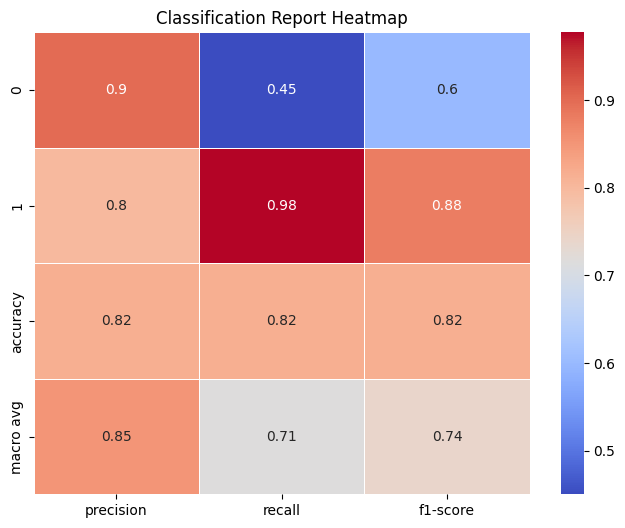

In [388]:
report_rf = pd.DataFrame(classification_report_rf).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_rf.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

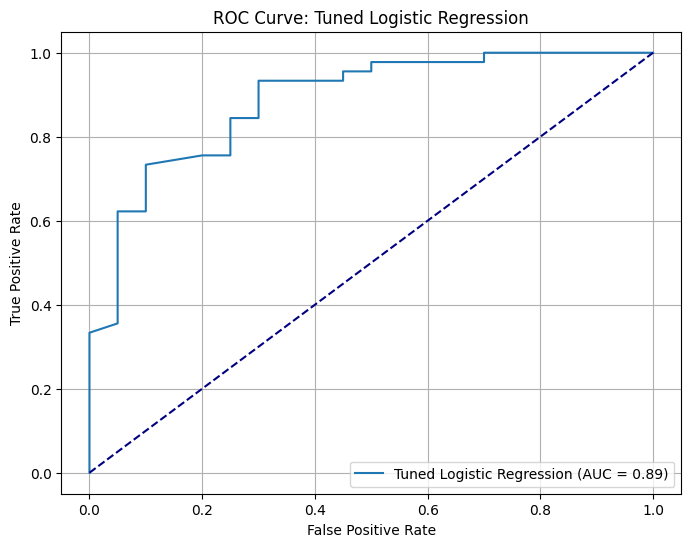

Tuned Random Forest AUC: 0.8861111111111112


In [392]:
# Predict probabilities and calculate ROC for best model

y_pred_proba_tuned = best_rf.predict_proba(X_test)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

# 3. Plotting the ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Logistic Regression (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Tuned Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores for comparison
print(f"Tuned Random Forest AUC: {auc_tuned}")

Decision Tree

In [352]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [353]:
y_pred_dt = dt.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred_dt)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred_dt)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,y_pred_dt)*100}\n\n\n")


Confusion Matrix is: 
 [[ 7 13]
 [ 6 39]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.54      0.35      0.42        20
           1       0.75      0.87      0.80        45

    accuracy                           0.71        65
   macro avg       0.64      0.61      0.61        65
weighted avg       0.68      0.71      0.69        65




Accuracy Percent is: 
 70.76923076923077





In [354]:
# parameters Decision
param_grid_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Apply GridSearchCV
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Best parameters from the grid search
print("Best Hyperparameters:", grid_dt.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=

In [355]:
best_dt = DecisionTreeClassifier(criterion= 'gini',max_depth= 20, max_features= 'log2', min_samples_leaf= 1, min_samples_split=5)
best_dt.fit(X_train, y_train)
ypred_dt=best_dt.predict(X_test)

In [356]:
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,ypred_dt)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,ypred_dt)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,ypred_dt)*100}\n\n\n")

Confusion Matrix is: 
 [[11  9]
 [ 8 37]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.80      0.82      0.81        45

    accuracy                           0.74        65
   macro avg       0.69      0.69      0.69        65
weighted avg       0.73      0.74      0.74        65




Accuracy Percent is: 
 73.84615384615385





In [393]:
classification_report_dt=classification_report(y_test,ypred_dt,output_dict=True)

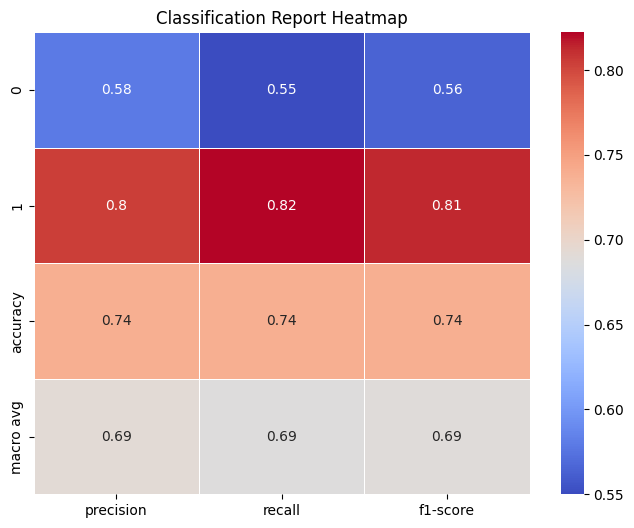

In [394]:
report_dt = pd.DataFrame(classification_report_dt).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_dt.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

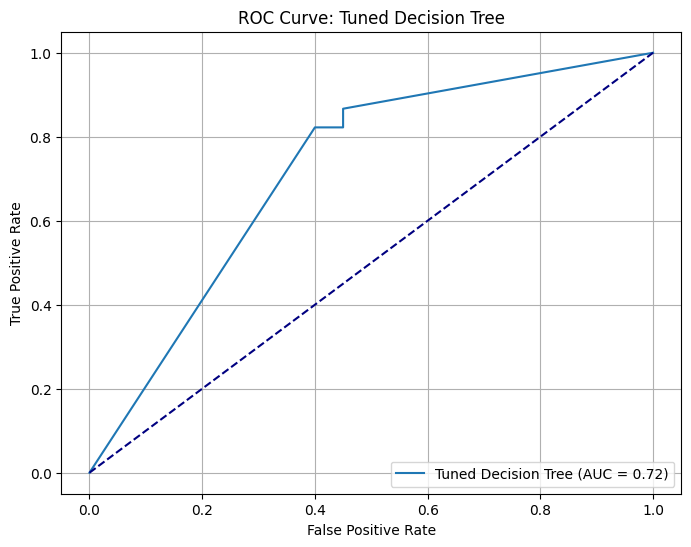

Tuned Decision Tree AUC: 0.7188888888888889


In [399]:
# Predict probabilities and calculate ROC for best model

y_pred_proba_tuned = best_dt.predict_proba(X_test)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

# 3. Plotting the ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Decision Tree (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Tuned Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores for comparison
print(f"Tuned Decision Tree AUC: {auc_tuned}")

KNN

In [361]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [362]:
y_pred_knn = knn.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred_knn)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred_knn)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,y_pred_knn)*100}\n\n\n")


Confusion Matrix is: 
 [[ 8 12]
 [ 2 43]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.80      0.40      0.53        20
           1       0.78      0.96      0.86        45

    accuracy                           0.78        65
   macro avg       0.79      0.68      0.70        65
weighted avg       0.79      0.78      0.76        65




Accuracy Percent is: 
 78.46153846153847





In [363]:
# parameters for KNeighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1)

In [366]:
grid_knn.fit(X_train, y_train)
ypred_knn=grid_knn.predict(X_test)
print("Best parameters for KNeighborsClassifier: ", grid_knn.best_params_)
knn_best = grid_knn.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [367]:
best_knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 5, weights='distance')

In [369]:
best_knn.fit(X_train, y_train)
ypred_bestknn=best_knn.predict(X_test)

In [370]:
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,ypred_bestknn)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,ypred_bestknn)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,ypred_bestknn)*100}\n\n\n")

Confusion Matrix is: 
 [[ 8 12]
 [ 1 44]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.89      0.40      0.55        20
           1       0.79      0.98      0.87        45

    accuracy                           0.80        65
   macro avg       0.84      0.69      0.71        65
weighted avg       0.82      0.80      0.77        65




Accuracy Percent is: 
 80.0





In [396]:
classification_report_knn=classification_report(y_test,ypred_bestknn,output_dict=True)

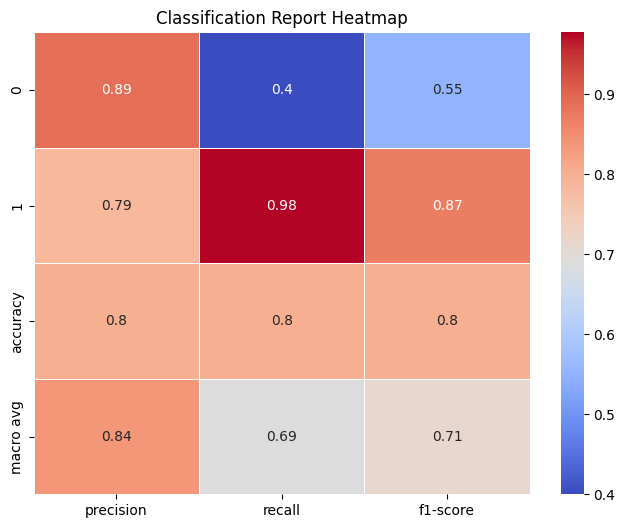

In [397]:
report_knn = pd.DataFrame(classification_report_knn).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_knn.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

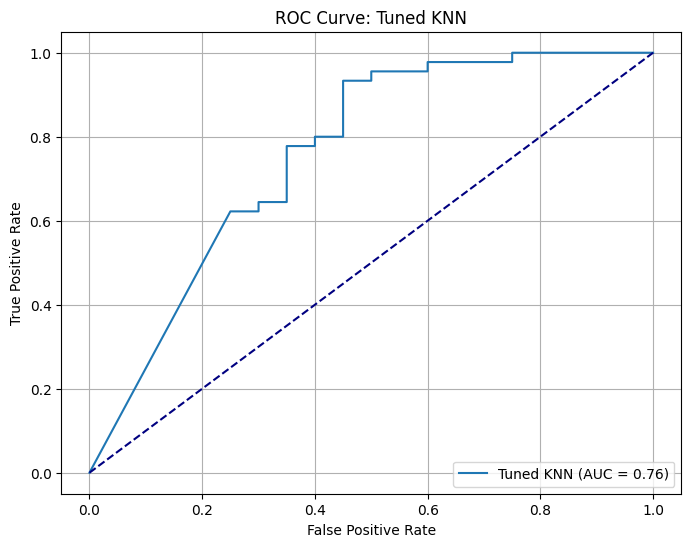

Tuned KNN AUC: 0.758888888888889


In [400]:
# Predict probabilities and calculate ROC for best model

y_pred_proba_tuned = best_knn.predict_proba(X_test)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

# 3. Plotting the ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned KNN (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Tuned KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Tuned KNN AUC: {auc_tuned}")

Voting Classifier

In [401]:
# Ensemble the models using VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr), ('rf', best_rf), ('dt', best_dt), ('KNN',best_knn )], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Voting Classifier Evaluation
print("Voting Classifier Accuracy: ", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))

Voting Classifier Accuracy:  0.7692307692307693
              precision    recall  f1-score   support

           0       0.73      0.40      0.52        20
           1       0.78      0.93      0.85        45

    accuracy                           0.77        65
   macro avg       0.75      0.67      0.68        65
weighted avg       0.76      0.77      0.75        65

[[ 8 12]
 [ 3 42]]


In [411]:
# compare performance with individual models
#Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, best_lr.predict(X_test))}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, best_rf.predict(X_test))}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, best_dt.predict(X_test))}")
print(f"KNN Accuracy: {accuracy_score(y_test, best_knn.predict(X_test))}")
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting)}\n\n\n")

#Precision
print(f"Logistic Regression Precision: {precision_score(y_test, best_lr.predict(X_test))}")
print(f"Random Forest Precision: {precision_score(y_test, best_rf.predict(X_test))}")
print(f"Decision Tree Precision: {precision_score(y_test, best_dt.predict(X_test))}")
print(f"KNN Precision: {precision_score(y_test, best_knn.predict(X_test))}")
print(f"Voting Classifier Precision: {precision_score(y_test, y_pred_voting)}\n\n\n")

#Recall
print(f"Logistic Regression Recall : {recall_score(y_test, best_lr.predict(X_test))}")
print(f"Random Forest Recall: {recall_score(y_test, best_rf.predict(X_test))}")
print(f"Decision Tree Recall: {recall_score(y_test, best_dt.predict(X_test))}")
print(f"KNN Recall: {recall_score(y_test, best_knn.predict(X_test))}")
print(f"Voting Classifier Recall: {recall_score(y_test, y_pred_voting)}\n\n\n")

'''
#F1 Score
print(f"Logistic Regression Accuracy: {f1_score(y_test, best_lr.predict(X_test))}")
print(f"Random Forest Accuracy: {f1_score(y_test, best_rf.predict(X_test))}")
print(f"Decision Tree Accuracy: {f1_score(y_test, best_dt.predict(X_test))}")
print(f"KNN Accuracy: {f1_score(y_test, best_knn.predict(X_test))}")
print(f"Voting Classifier Accuracy: {f1_score(y_test, y_pred_voting)}")

'''
# classification reports for individual models
print("Logistic Regression Report:\n", classification_report(y_test, best_lr.predict(X_test)))
print("Random Forest Classification Report:\n", classification_report(y_test, best_rf.predict(X_test)))
print("Decision Tree Classification Report:\n", classification_report(y_test, best_dt.predict(X_test)))
print("KNN Classification Report:\n", classification_report(y_test, best_knn.predict(X_test)))

Logistic Regression Accuracy: 0.8307692307692308
Random Forest Accuracy: 0.8153846153846154
Decision Tree Accuracy: 0.7384615384615385
KNN Accuracy: 0.8
Voting Classifier Accuracy: 0.7692307692307693



Logistic Regression Precision: 0.84
Random Forest Precision: 0.8
Decision Tree Precision: 0.8043478260869565
KNN Precision: 0.7857142857142857
Voting Classifier Precision: 0.7777777777777778



Logistic Regression Recall : 0.9333333333333333
Random Forest Recall: 0.9777777777777777
Decision Tree Recall: 0.8222222222222222
KNN Recall: 0.9777777777777777
Voting Classifier Recall: 0.9333333333333333



Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.84      0.93      0.88        45

    accuracy                           0.83        65
   macro avg       0.82      0.77      0.78        65
weighted avg       0.83      0.83      0.82        65

Random Forest Classification Report:
 